# READ DATA


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhilbhosle/employee-attrition-uncleaned-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/employee-attrition-uncleaned-dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pickle


In [ ]:
df=pd.read_csv(path+'/Emp_attrition_csv.csv')

In [ ]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74605,13450,44,Female,20,Healthcare,7578,Fair,Medium,Low,2,...,3,Mid,Large,52.0,No,No,No,Fair,Very High,Left
74606,2386,45,Male,26,Technology,8342,Excellent,Very High,Below Average,3,...,4,Mid,Medium,NaN,Yes,No,No,Poor,High,Stayed
74607,36968,28,Female,3,Technology,9763,Poor,Low,Average,0,...,3,Senior,Small,67.0,No,No,No,Poor,Medium,Left
74608,24276,37,Male,3,Education,3644,Fair,High,Average,2,...,4,Entry,Medium,16.0,No,No,No,Excellent,Medium,Stayed


In [ ]:
df.shape

(74610, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746


# clean data and preprocessing


In [ ]:
df.drop(['Employee ID'],axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(112)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
Company Tenure (In Months),2413
Distance from Home,1912
Age,0
Job Role,0
Monthly Income,0
Gender,0
Years at Company,0
Job Satisfaction,0
Work-Life Balance,0
Number of Promotions,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74498.000000,74498.000000,74498.000000,74498.000000,72601.000000,74498.000000,72117.000000
mean,38.529746,15.721603,7344.875366,0.832935,49.992080,1.657494,55.709708
std,12.083456,11.223744,2597.084234,0.995289,28.517412,1.579959,25.392109
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


In [ ]:
from sklearn.impute import SimpleImputer


cat_cols = df.select_dtypes(include='object').columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0
Overtime,0


In [ ]:
df['Job Role'].unique()

array(['Education', 'Media', 'Healthcare', 'Technology', 'Finance'],
      dtype=object)

In [ ]:
df.nunique()

,0
Age,42
Gender,2
Years at Company,51
Job Role,5
Monthly Income,9836
Work-Life Balance,4
Job Satisfaction,4
Performance Rating,4
Number of Promotions,5
Overtime,2


In [ ]:
df['Company Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

# EDA: Visualization

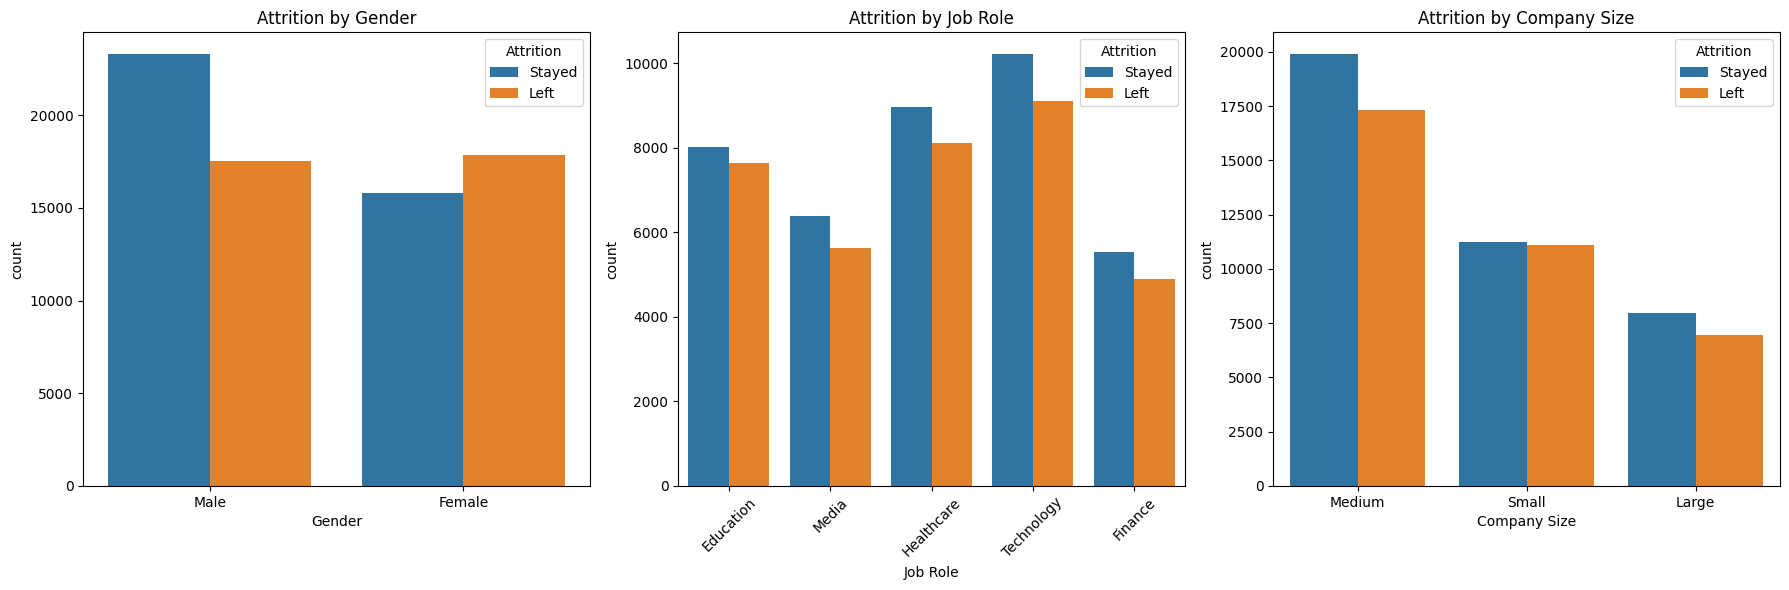

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='Gender', hue='Attrition', data=df, ax=axes[0])
axes[0].set_title('Attrition by Gender')

sns.countplot(x='Job Role', hue='Attrition', data=df, ax=axes[1])
axes[1].set_title('Attrition by Job Role')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(x='Company Size', hue='Attrition', data=df, ax=axes[2])
axes[2].set_title('Attrition by Company Size')

plt.tight_layout()
plt.show()

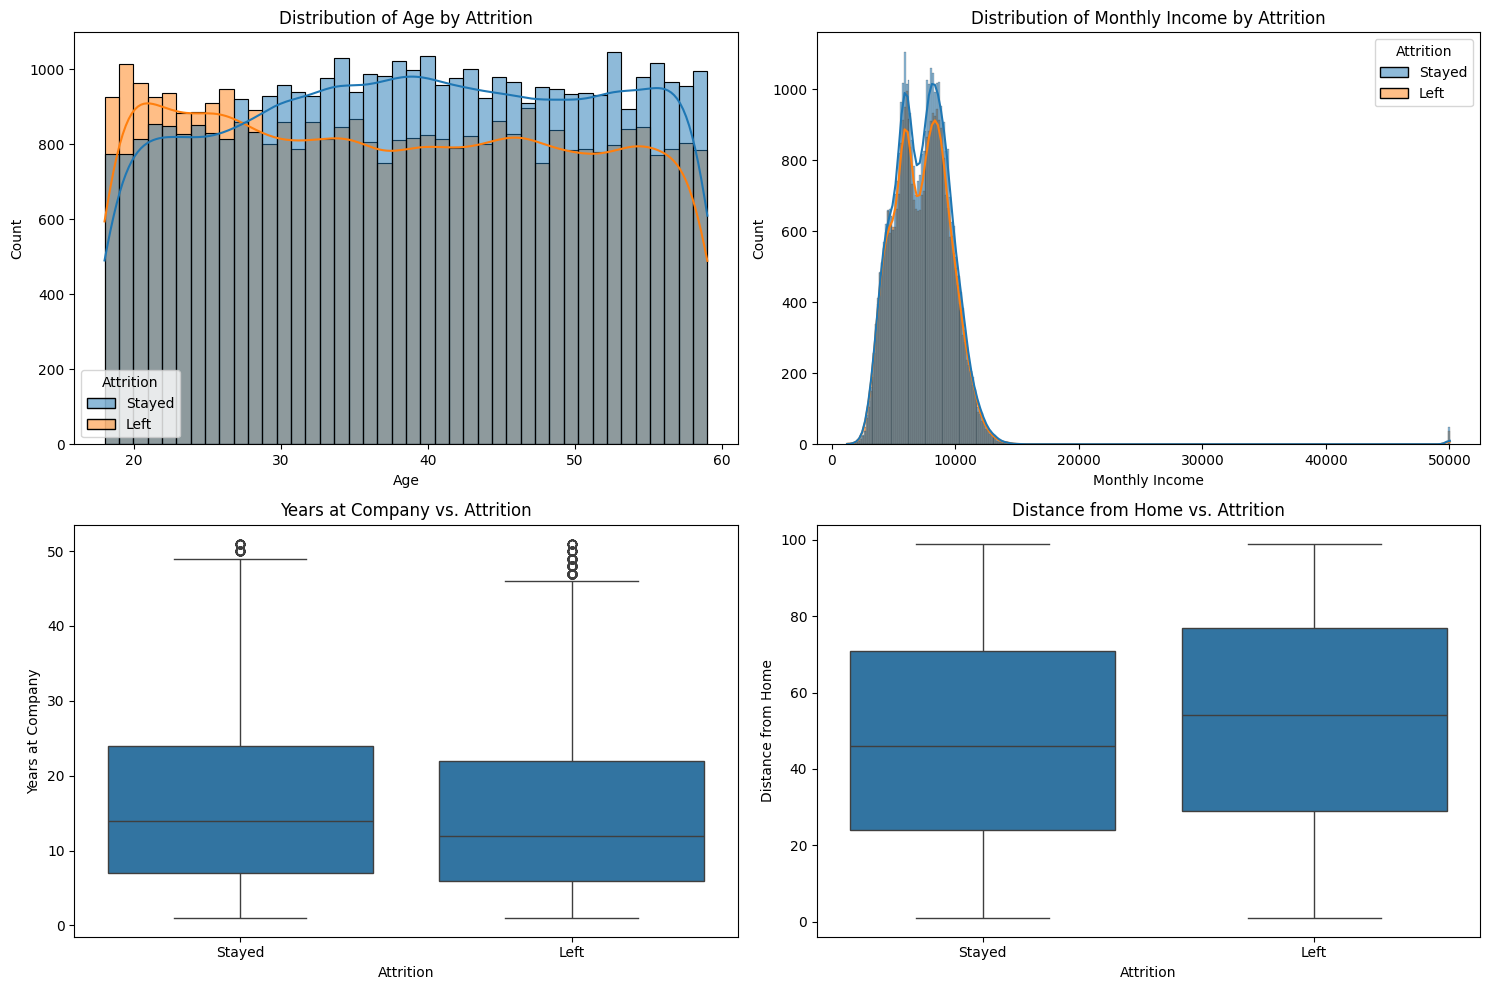

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x='Age', hue='Attrition', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age by Attrition')

sns.histplot(data=df, x='Monthly Income', hue='Attrition', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Monthly Income by Attrition')

sns.boxplot(x='Attrition', y='Years at Company', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Years at Company vs. Attrition')

sns.boxplot(x='Attrition', y='Distance from Home', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distance from Home vs. Attrition')

plt.tight_layout()
plt.show()

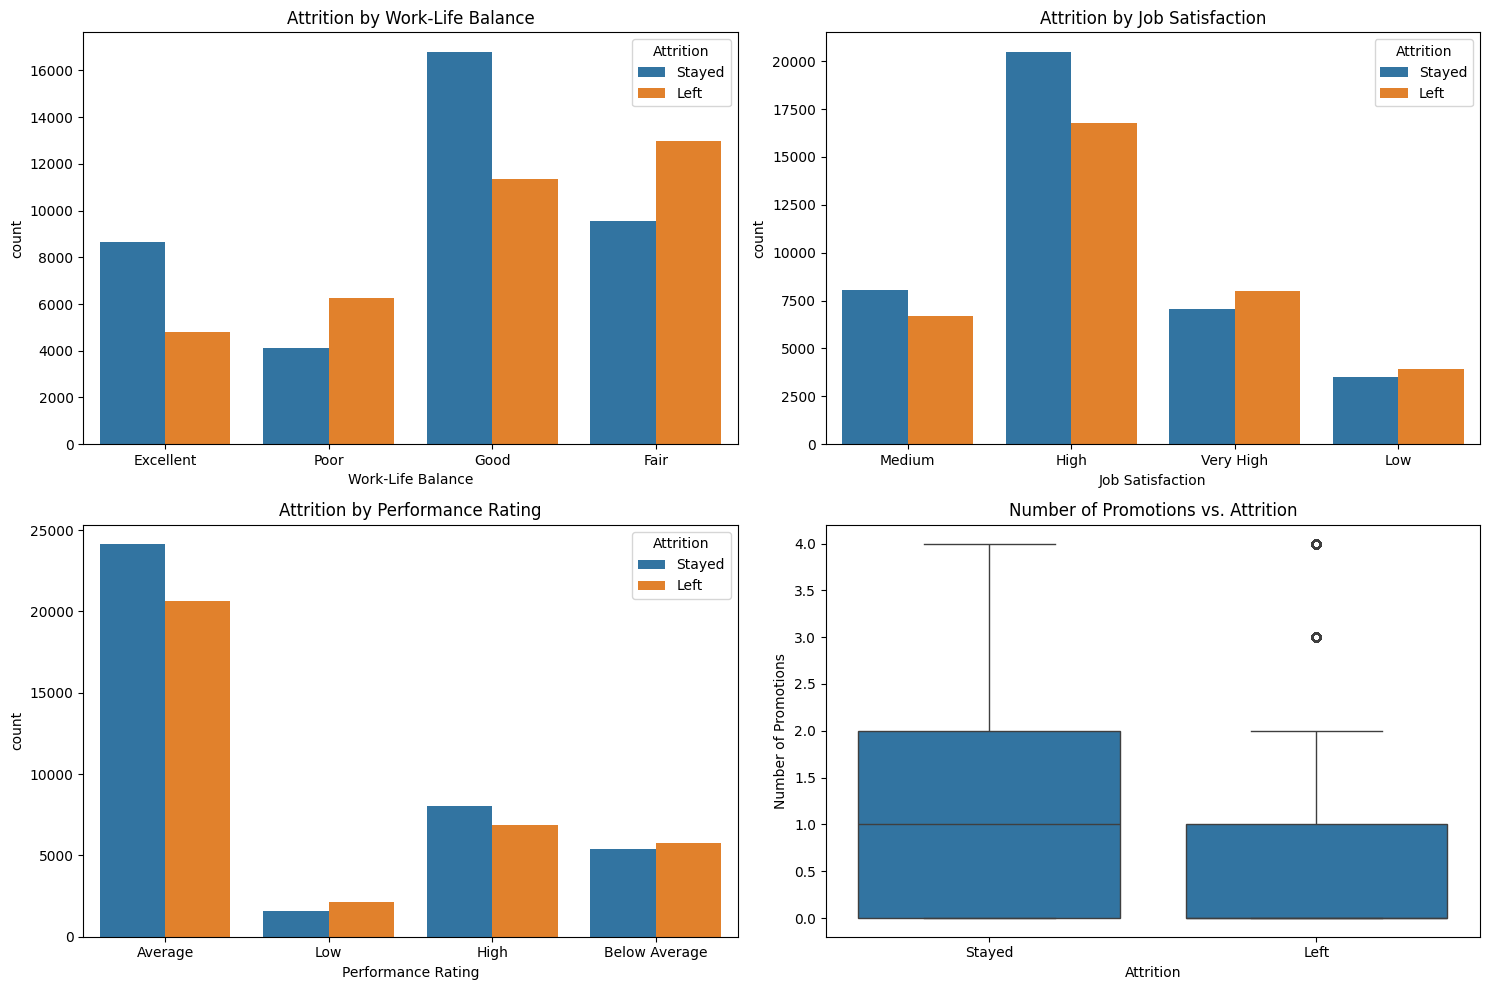

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Work-Life Balance', hue='Attrition', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Work-Life Balance')

sns.countplot(x='Job Satisfaction', hue='Attrition', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Job Satisfaction')

sns.countplot(x='Performance Rating', hue='Attrition', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Performance Rating')

sns.boxplot(x='Attrition', y='Number of Promotions', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Number of Promotions vs. Attrition')

plt.tight_layout()
plt.show()

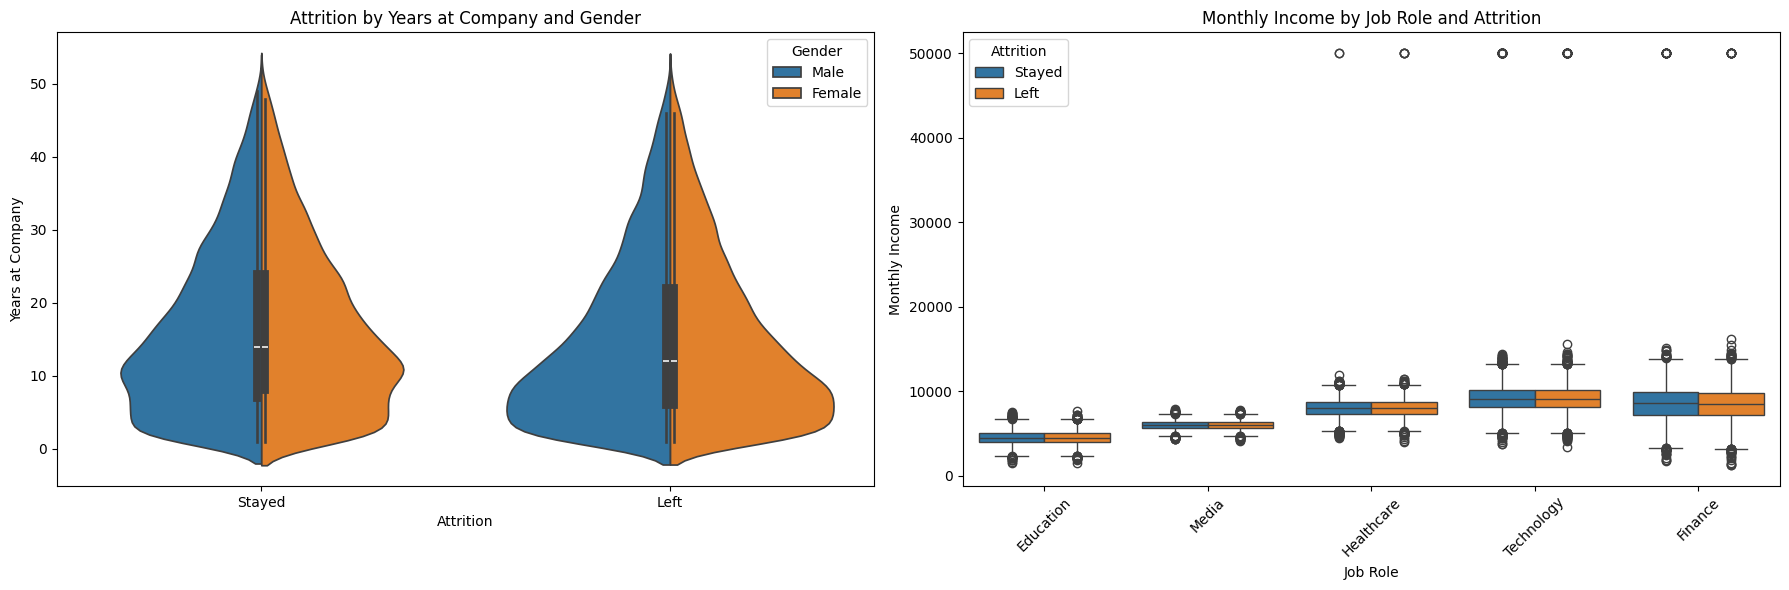

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(x='Attrition', y='Years at Company', hue='Gender', data=df, ax=axes[0], split=True)
axes[0].set_title('Attrition by Years at Company and Gender')

sns.boxplot(x='Job Role', y='Monthly Income', hue='Attrition', data=df, ax=axes[1])
axes[1].set_title('Monthly Income by Job Role and Attrition')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

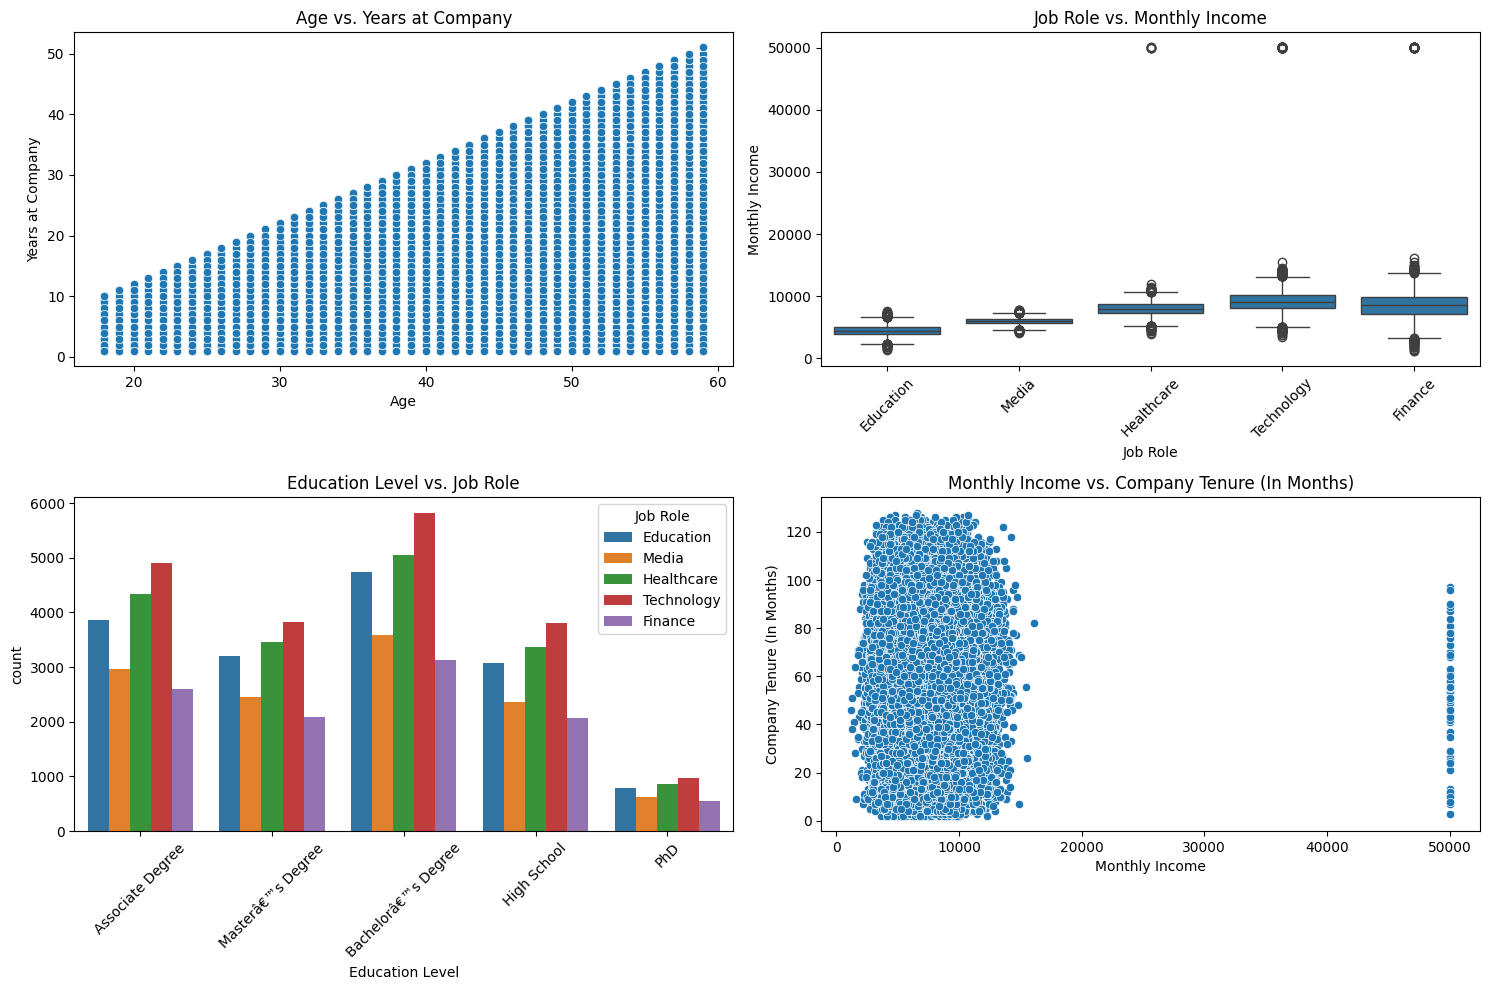

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(data=df, x='Age', y='Years at Company', ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Years at Company')

sns.boxplot(data=df, x='Job Role', y='Monthly Income', ax=axes[0, 1])
axes[0, 1].set_title('Job Role vs. Monthly Income')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Education Level', hue='Job Role', ax=axes[1, 0])
axes[1, 0].set_title('Education Level vs. Job Role')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.scatterplot(data=df, x='Monthly Income', y='Company Tenure (In Months)', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Income vs. Company Tenure (In Months)')

plt.tight_layout()
plt.show()

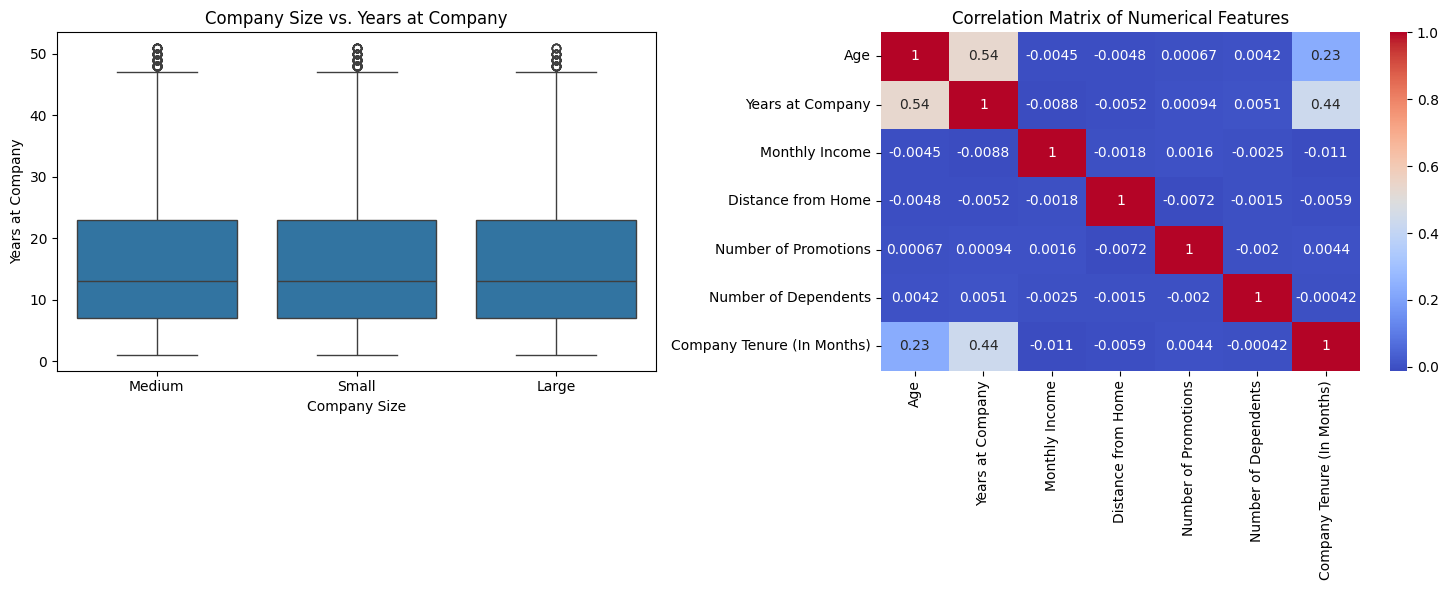

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df, x='Company Size', y='Years at Company', ax=axes[0])
axes[0].set_title('Company Size vs. Years at Company')

sns.heatmap(df[['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Number of Promotions', 'Number of Dependents', 'Company Tenure (In Months)']].corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix of Numerical Features')

plt.tight_layout()
plt.show()

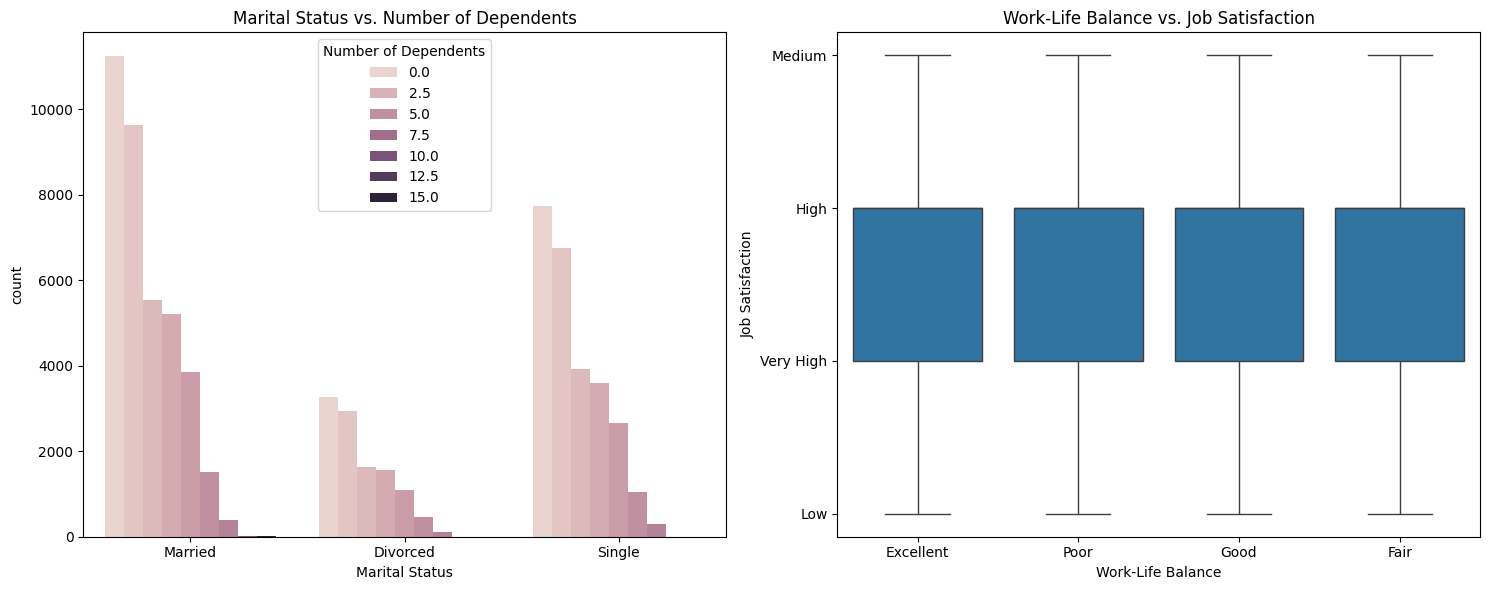

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='Marital Status', hue='Number of Dependents', ax=axes[0])
axes[0].set_title('Marital Status vs. Number of Dependents')

sns.boxplot(data=df, x='Work-Life Balance', y='Job Satisfaction', ax=axes[1])
axes[1].set_title('Work-Life Balance vs. Job Satisfaction')

plt.tight_layout()
plt.show()

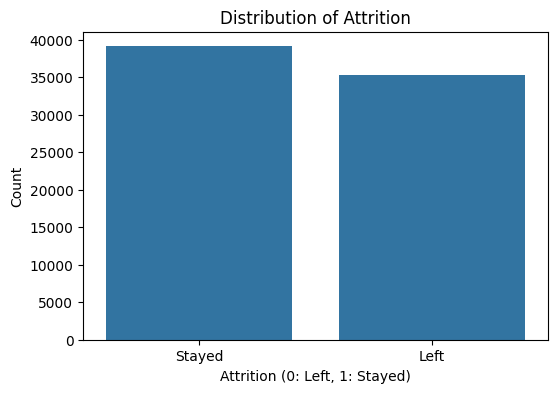

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (0: Left, 1: Stayed)')
plt.ylabel('Count')
plt.show()

<Axes: >

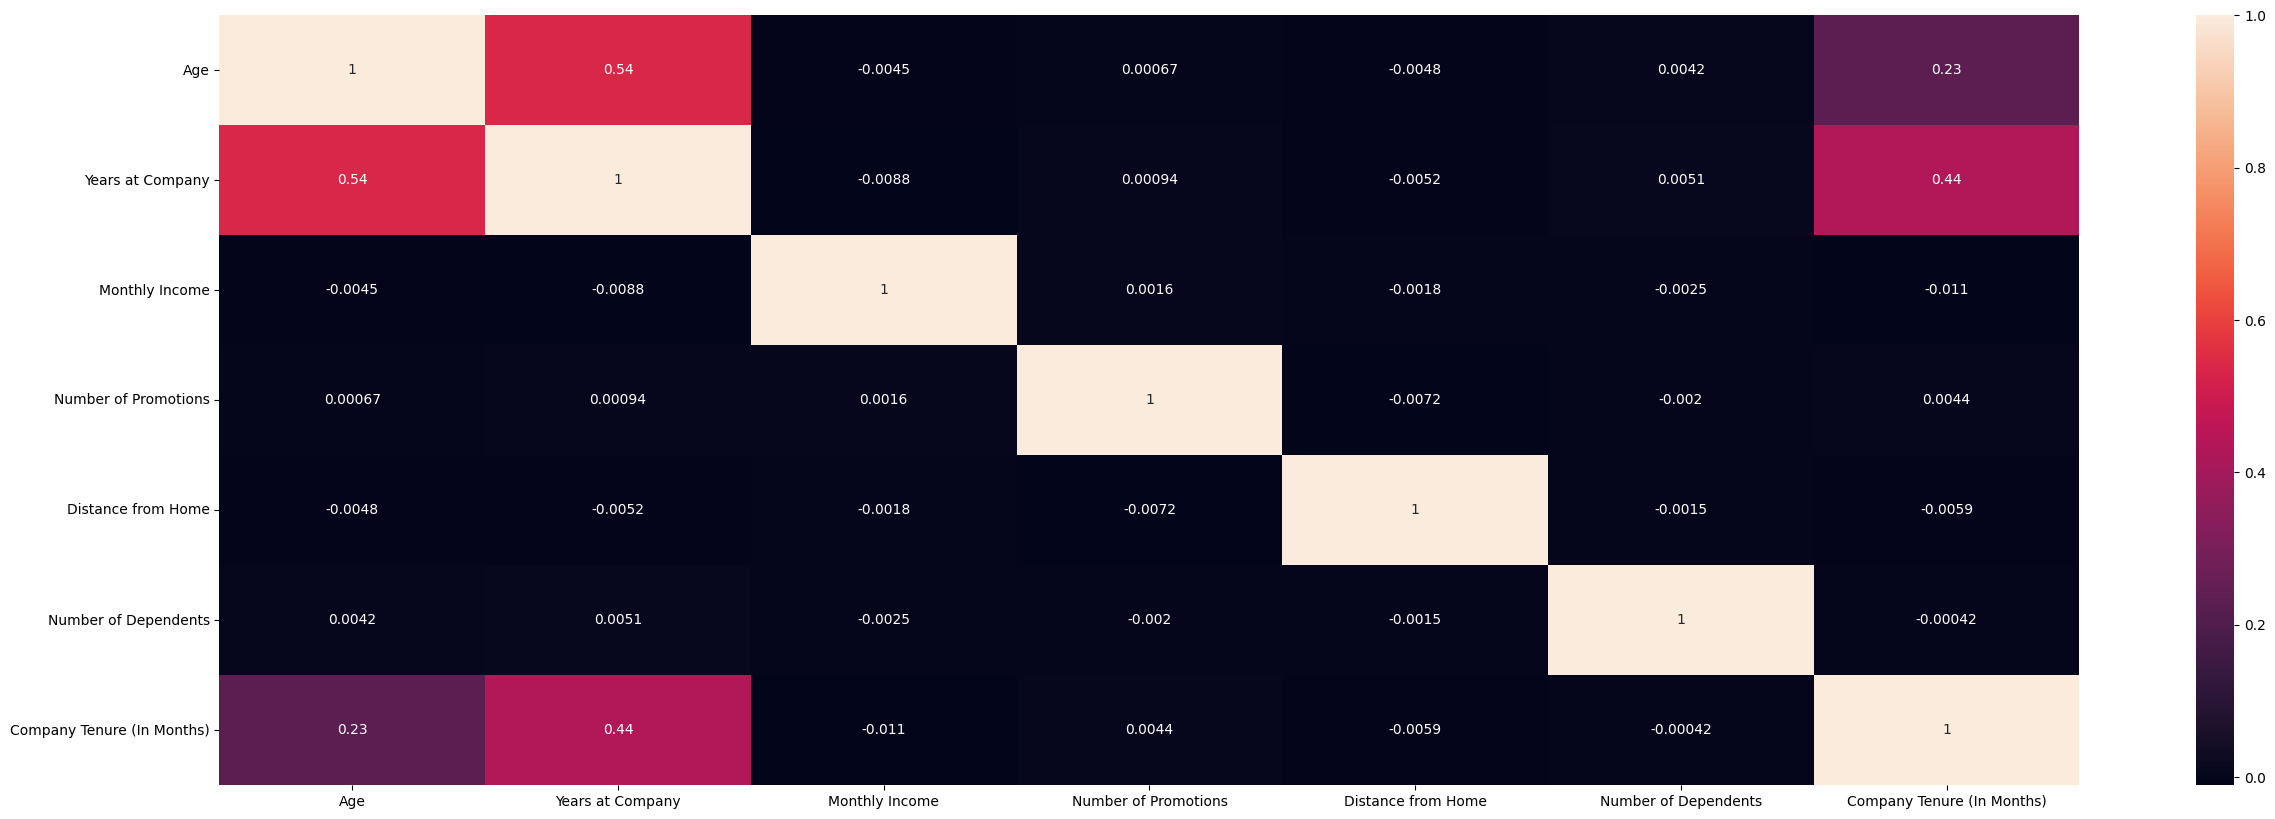

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# cat_cols = df.select_dtypes(include='object').columns
# lb=LabelEncoder()
# for cols in cat_cols:
#   df[cols]=lb.fit_transform(df[cols])




In [ ]:
cat_cols = df.select_dtypes(include='object').columns

cats = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    cats[col] = le

import joblib
joblib.dump(cats, "label_encode.pkl")
#with open("label_encode.pkl", "wb") as f:
#     pickle.dump(cats, f)#وencoding='ASCII')


['label_encode.pkl']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
x = df.drop('Attrition', axis=1)
y = df['Attrition']

# Apply Random Under-sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(x, y)

# Display the class distribution after balancing
print("Class distribution after Random Under-sampling:")
print(y_balanced.value_counts())

Class distribution after Random Under-sampling:
Attrition
0    35370
1    35370
Name: count, dtype: int64


In [ ]:
x.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure (In Months)',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')

In [ ]:
# # prompt: make oversampling for the data

# from imblearn.over_sampling import RandomOverSampler

# # Apply Random Over-sampling to the data
# ros = RandomOverSampler(random_state=42)
# X_oversampled, y_oversampled = ros.fit_resample(x, y)

# # Display the class distribution after oversampling
# print("\nClass distribution after Random Over-sampling:")
# print(y_oversampled.value_counts())

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Models = {
    'LogisticRegression': LogisticRegression(max_iter=5000),

    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=20, min_samples_split=10),

    'RandomForestClassifier': RandomForestClassifier(n_estimators=500, max_depth=20),

    # 'SVC': SVC(kernel='rbf', C=1)

}

In [ ]:
# #Data model results before sampling
# from tqdm import tqdm
# ModelName = []
# ModelAccuracy = []
# for nameModel, model in tqdm(Models.items()):
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     ModelName.append(nameModel)
#     ModelAccuracy.append([
#         accuracy_score(y_test, y_pred),
#         precision_score(y_test, y_pred, average='weighted', zero_division=1),
#         recall_score(y_test, y_pred, average='weighted'),
#         f1_score(y_test, y_pred, average='weighted')

#     ])
# Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Model_accuracy

  0%|          | 0/5 [00:00<?, ?it/s]

--- LogisticRegression ---
Confusion Matrix:


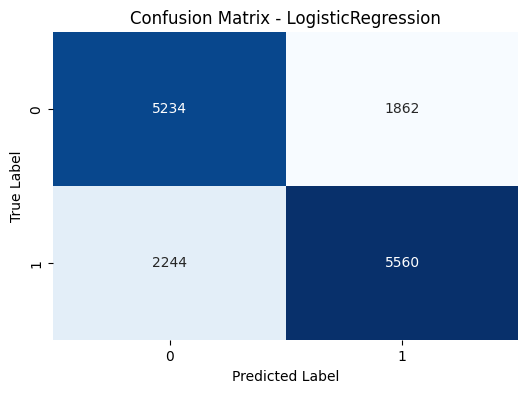

 20%|██        | 1/5 [00:00<00:01,  2.99it/s]

[[5234 1862]
 [2244 5560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      7096
           1       0.75      0.71      0.73      7804

    accuracy                           0.72     14900
   macro avg       0.72      0.73      0.72     14900
weighted avg       0.73      0.72      0.72     14900

------------------------------
--- GaussianNB ---
Confusion Matrix:


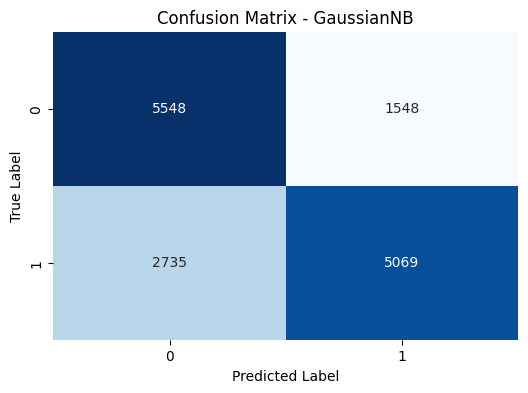

 40%|████      | 2/5 [00:00<00:00,  4.45it/s]

[[5548 1548]
 [2735 5069]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      7096
           1       0.77      0.65      0.70      7804

    accuracy                           0.71     14900
   macro avg       0.72      0.72      0.71     14900
weighted avg       0.72      0.71      0.71     14900

------------------------------
--- KNeighborsClassifier ---
Confusion Matrix:


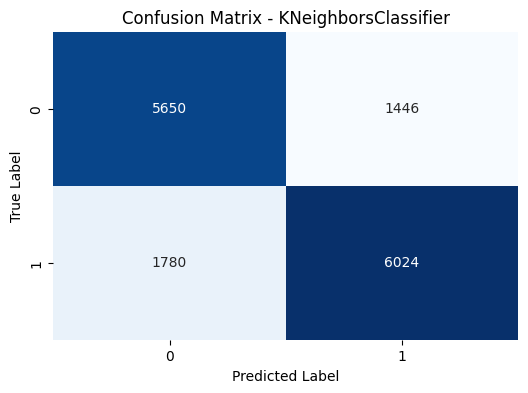

 60%|██████    | 3/5 [00:08<00:07,  3.65s/it]

[[5650 1446]
 [1780 6024]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      7096
           1       0.81      0.77      0.79      7804

    accuracy                           0.78     14900
   macro avg       0.78      0.78      0.78     14900
weighted avg       0.78      0.78      0.78     14900

------------------------------
--- DecisionTreeClassifier ---
Confusion Matrix:


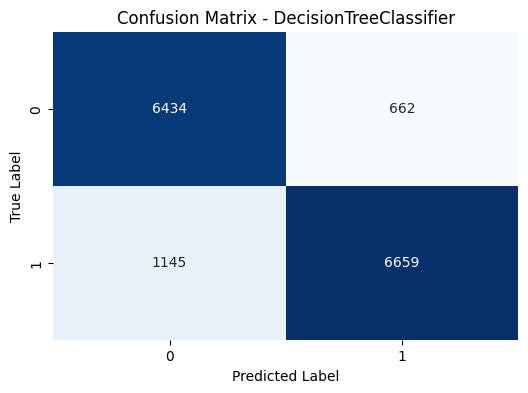

 80%|████████  | 4/5 [00:09<00:02,  2.56s/it]

[[6434  662]
 [1145 6659]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7096
           1       0.91      0.85      0.88      7804

    accuracy                           0.88     14900
   macro avg       0.88      0.88      0.88     14900
weighted avg       0.88      0.88      0.88     14900

------------------------------
--- RandomForestClassifier ---
Confusion Matrix:


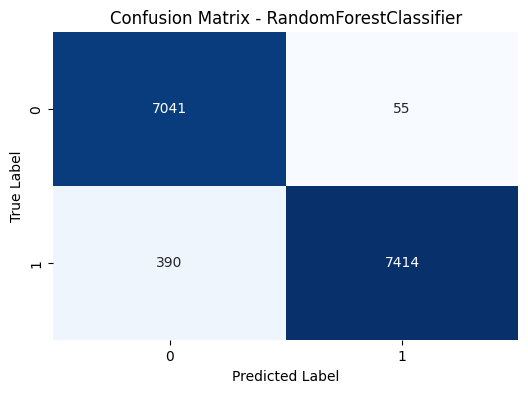

[[7041   55]
 [ 390 7414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7096
           1       0.99      0.95      0.97      7804

    accuracy                           0.97     14900
   macro avg       0.97      0.97      0.97     14900
weighted avg       0.97      0.97      0.97     14900

------------------------------


100%|██████████| 5/5 [01:26<00:00, 17.27s/it]


,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.724430,0.725691,0.724430,0.724584
GaussianNB,0.712550,0.720218,0.712550,0.711813
KNeighborsClassifier,0.783490,0.784521,0.783490,0.783612
DecisionTreeClassifier,0.878725,0.880691,0.878725,0.878784
RandomForestClassifier,0.970134,0.971149,0.970134,0.970151


In [ ]:
#data model results after sampling i used under sampling because over sampling reduces the accuracy
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import joblib

ModelName = []
ModelAccuracy = []
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)
x_test_scaled = scaler.transform(x_test)


for nameModel, model in tqdm(Models.items()):
    model.fit(X_balanced_scaled, y_balanced)
    y_pred = model.predict(x_test_scaled)
    ModelName.append(nameModel)
    ModelAccuracy.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted', zero_division=1),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
         ])
    print(f"--- {nameModel} ---")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {nameModel}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)
    if nameModel == 'RandomForestClassifier':
      joblib.dump(model, "Random_Forest.pkl")
      #with open("Random_Forest.pkl", "wb") as f:
      #      pickle.dump(model, f)
Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])


Model_accuracy

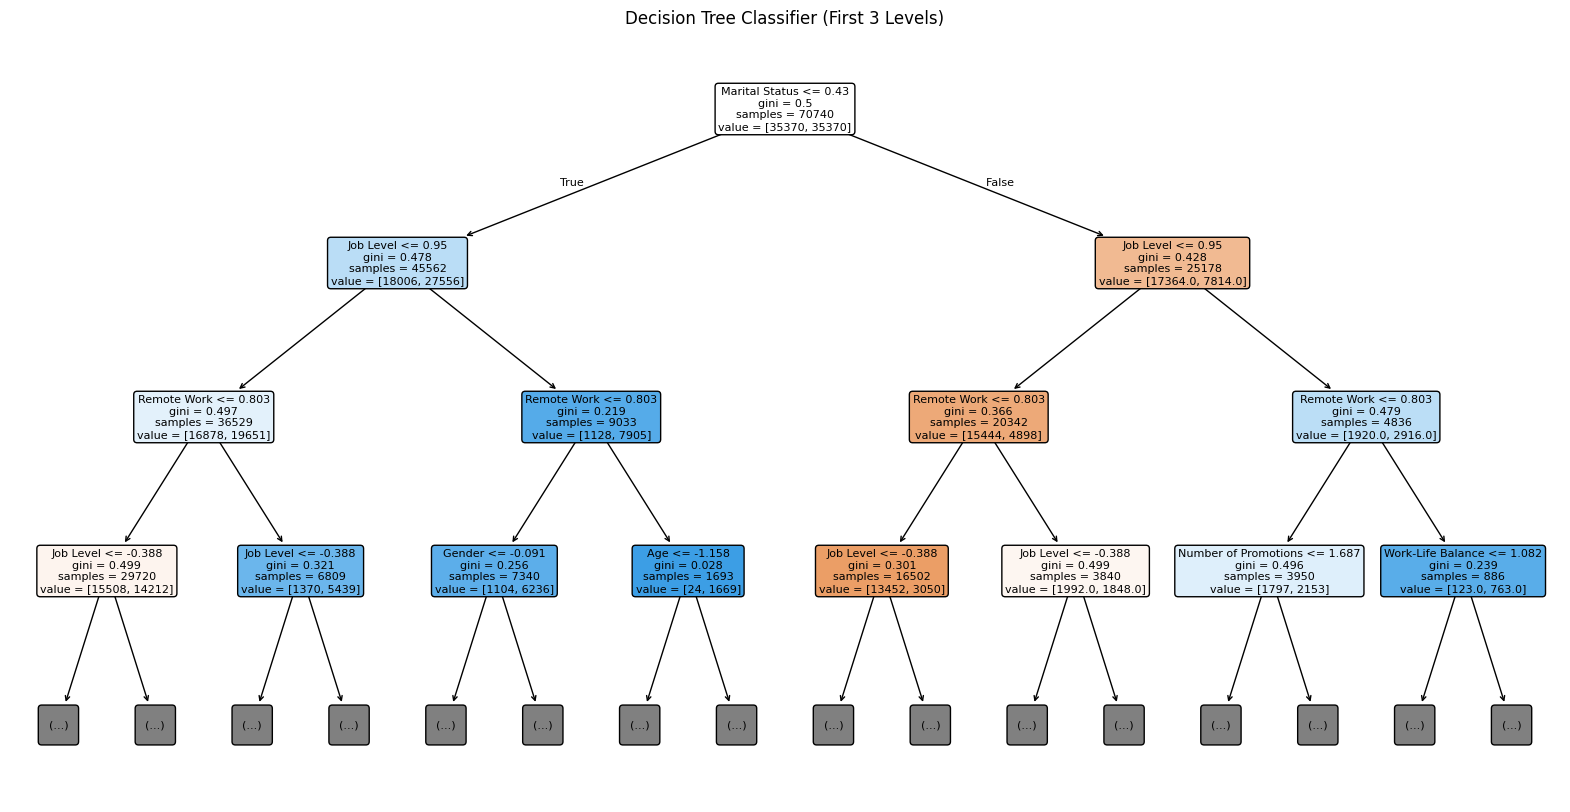

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(Models['DecisionTreeClassifier'], feature_names=x_train.columns.tolist(), filled=True, rounded=True, fontsize=8, max_depth=3)
plt.title('Decision Tree Classifier (First 3 Levels)')
plt.show()

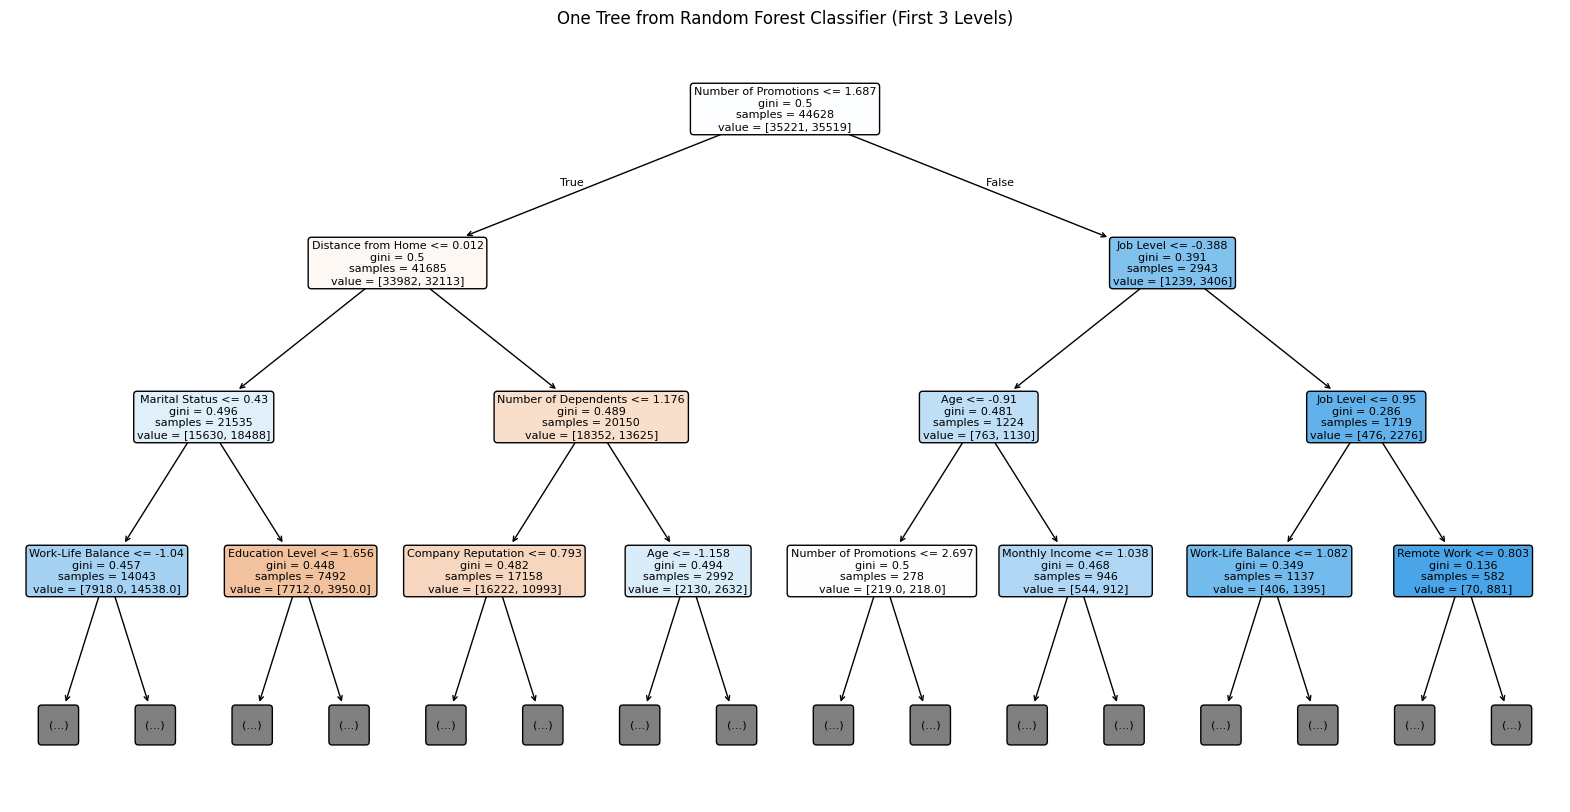

In [ ]:
# Visualize one tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(Models['RandomForestClassifier'].estimators_[0], feature_names=x_train.columns.tolist(), filled=True, rounded=True, fontsize=8, max_depth=3)
plt.title('One Tree from Random Forest Classifier (First 3 Levels)')
plt.show()

In [ ]:
from IPython.display import FileLink

FileLink("label_encode.pkl")

FileLink("Random_Forest.pkl")

/content/Random_Forest.pkl